In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style='whitegrid')

In [73]:
resp = pd.read_csv('ens_e_aval_agosto_2021_respostas.csv')
perg = pd.read_excel('ens_e_aval_agosto_2021_perguntas.xlsx')

# Retirando resposta de teste e coluna com emails dos alunos 
resp.drop([0], inplace=True)
resp.drop(['Endereço de e-mail'], axis = 1, inplace=True)
resp_num = resp.copy()
resp_num.columns = range(len(resp.columns))

# Limpeza dos dados
resp_num[2] = resp_num[2].map({'1°':1,'2°':2,'3°':3,'4°':4,'5°':5,'6°':6,'7°':7,'8°':8,'9°':9,'10°':10})

resp_num[0] = pd.to_datetime(resp_num[0])
resp_num[1] = pd.to_numeric(resp_num[1])
resp_agrup = resp_num.copy()

#Função para criar grupos a partir dos períodos em q cada aluno se encontra
def agrupa_alunos(row):
    val = 'Veteranos'
    if row == 1 or row ==2 or row == 3:
        val = 'Calouros'
    elif row == 8 or row ==9 or row ==10:
        val = 'Formandos'
    return val

#Aplicando função na coluna dos períodos e criando nova coluna 
resp_agrup[20] = resp_num.iloc[:,2].apply(agrupa_alunos)
resp.head()

,Carimbo de data/hora,Em qual ano você entrou na ELT?,A maioria das matérias que você está cursando pertencem a qual período?,As orientações dos professores te direcionam precisamente a estudar o que será avaliado?,Gostaria de ter avaliações mais frequentes?,Comentários pertinentes a esse contexto:,"Em geral, os experimentos práticos em laboratório facilitam a sua compreensão dos conteúdos teóricos?","Há estímulo ou motivação suficiente da metodologia de ensino, ou dos professores, para ""tentar enxergar"" a teoria nas práticas?","Você é capaz de abstrair, na maioria das práticas, os fenômenos teóricos estudados?",Comentários pertinentes a esse contexto:.1,A quantidade de momentos síncronos te satisfaz?,"Você gostaria de ter mais exemplos, a nível de prova, resolvidos pelos professores?",A quantidade de listas de exercícios te satisfaz?,"Nas aulas destinadas a dúvidas, elas são sanadas?",Gostaria de comentar o motivo?,"Até o quarto período do curso, você sente que teve um direcionamento satisfatório para as possíveis carreiras na Eng. Elétrica?","Em relação a esse direcionamento dado pelo departamento, quanto ele te motiva?",Quanto às avaliações:,Gostaria que existissem projetos práticos?,Comentários pertinentes a esse contexto:.2
1,30/08/2021 21:03:35,2020,3°,Sim,Não,NaN,Não,Não,Não,NaN,Sim,Sim,Sim,Não,NaN,Não,2,1.0,10.0,NaN
2,30/08/2021 21:04:15,2017,7°,Sim,Não,NaN,Sim,Não,Sim,NaN,Sim,Não,Não,Sim,NaN,Não,1,3.0,9.0,NaN
3,30/08/2021 21:08:02,2021,1°,Sim,Sim,NaN,Sim,Sim,Não,NaN,Não,Sim,Não,Sim,NaN,Não,4,8.0,9.0,NaN
4,30/08/2021 21:08:34,2018,5°,Não,Sim,NaN,Sim,Não,Não,NaN,Não,Sim,Não,Sim,NaN,Não,2,10.0,10.0,NaN
5,30/08/2021 21:09:11,2018,9°,Não,Sim,NaN,Sim,Não,Sim,NaN,Não,Sim,Não,Não,Estou cursando duas disciplinas quem nem seque...,Não,1,7.0,9.0,NaN


Text(0, 0.5, 'Quantidade de respostas')

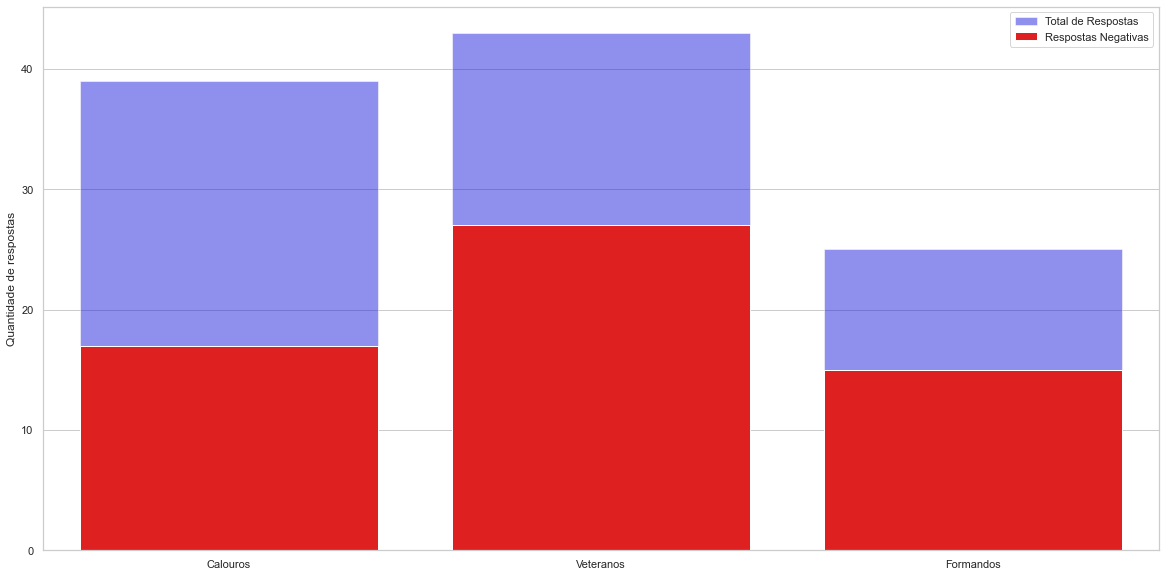

In [69]:
plt.figure(figsize = (20,10))
sns.barplot(data = resp_agrup.groupby(by=20,as_index=False).count(),
                x=20, y=3, color = 'blue', alpha = 0.5, label = 'Total de Respostas',
                order=['Calouros', 'Veteranos', 'Formandos'])
sns.barplot(data = resp_agrup.loc[resp_agrup[3]=='Não'].groupby(by=20,as_index=False).count(),
                x=20, y=3, color = 'red', alpha = 1, label = 'Respostas Negativas',
                order=['Calouros', 'Veteranos', 'Formandos'])
plt.legend()
plt.xlabel('')
plt.ylabel('Quantidade de respostas')